<a href="https://colab.research.google.com/github/hanene152/-Convenience-Store-Inventory/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, learning_r):
        self.weights = np.random.randn(3, 1)
        self.learning_rate = learning_r
        self.history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights))

    def train(self, inputs_train, labels_train, num_train_iterations):
        m = len(labels_train)
        for _ in range(num_train_iterations):
            predictions = self.forward_propagation(inputs_train)
            error = predictions - labels_train
            gradient = np.dot(inputs_train.T, error) / m
            self.weights -= self.learning_rate * gradient
            cost = -np.mean(labels_train * np.log(predictions) + (1 - labels_train) * np.log(1 - predictions))
            self.history.append((self.weights.copy(), cost))

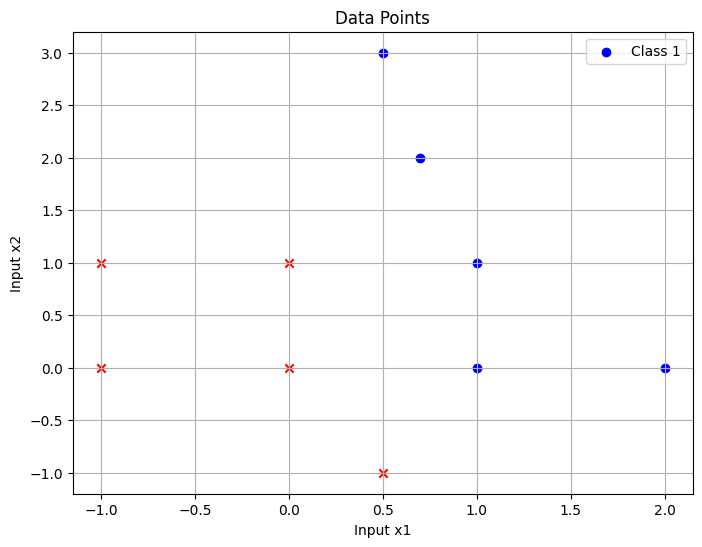

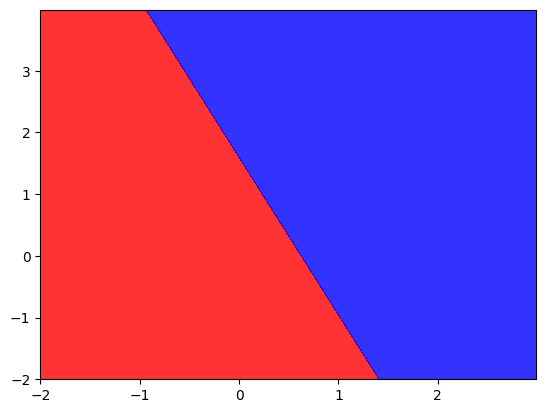

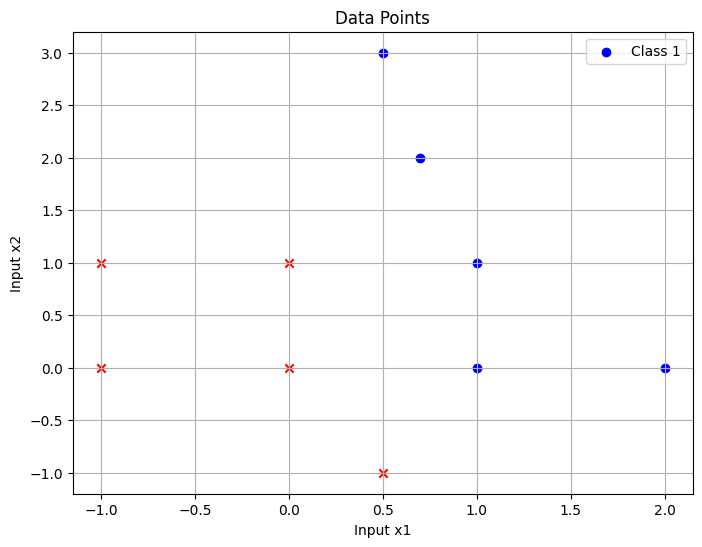

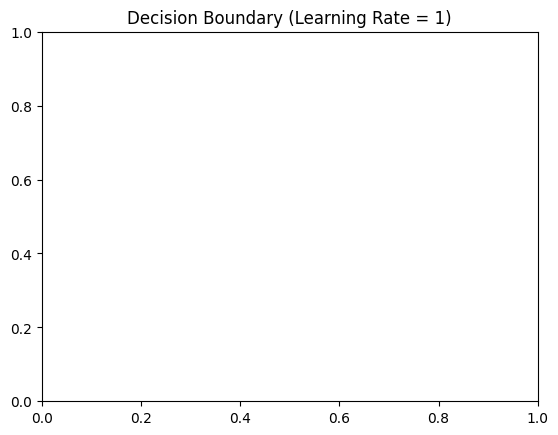

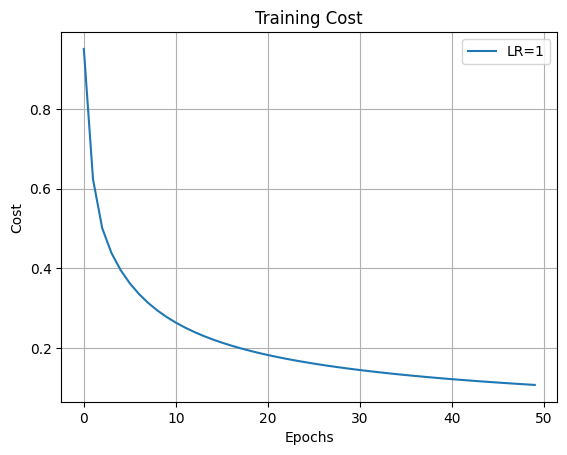

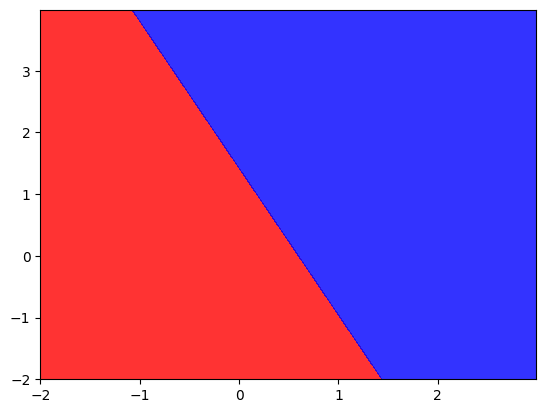

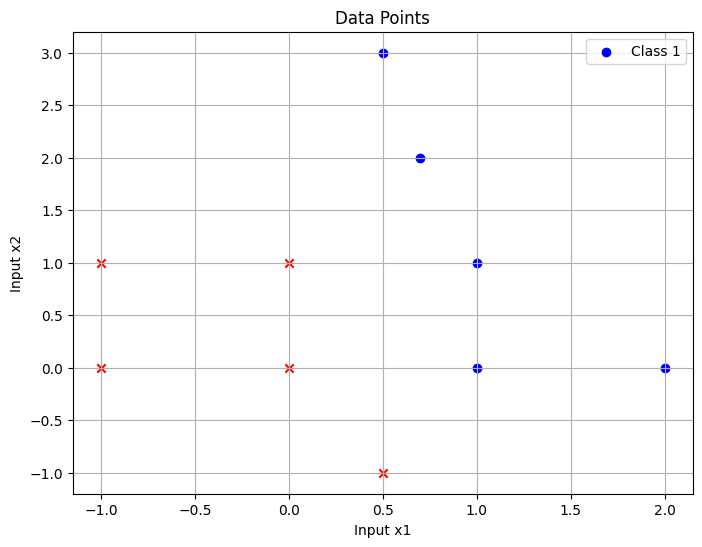

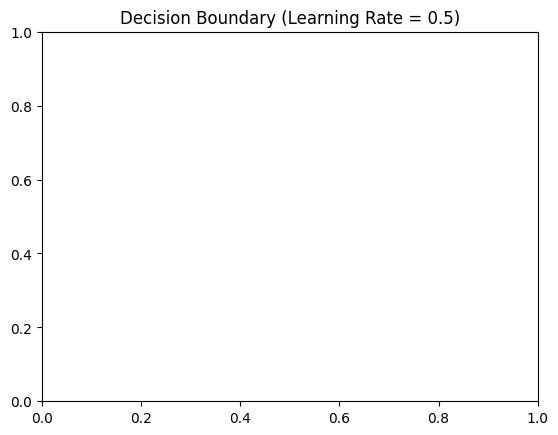

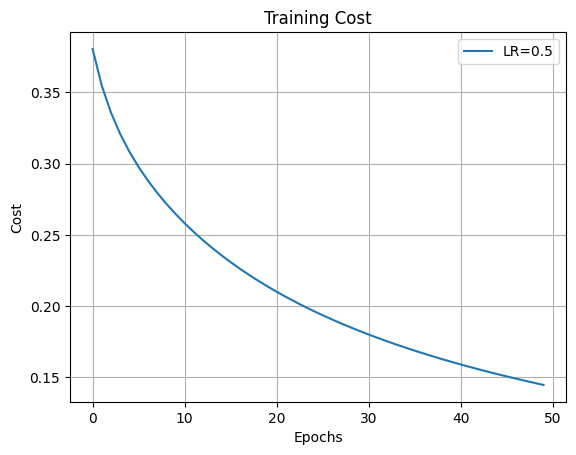

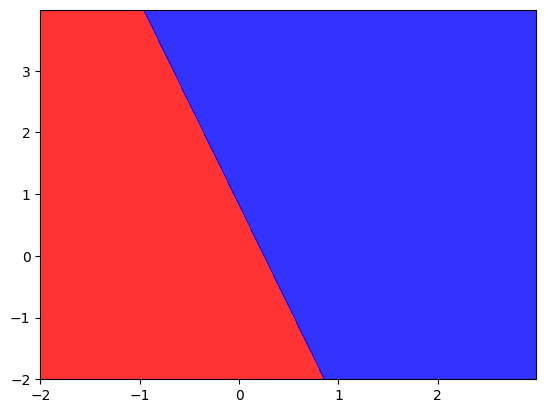

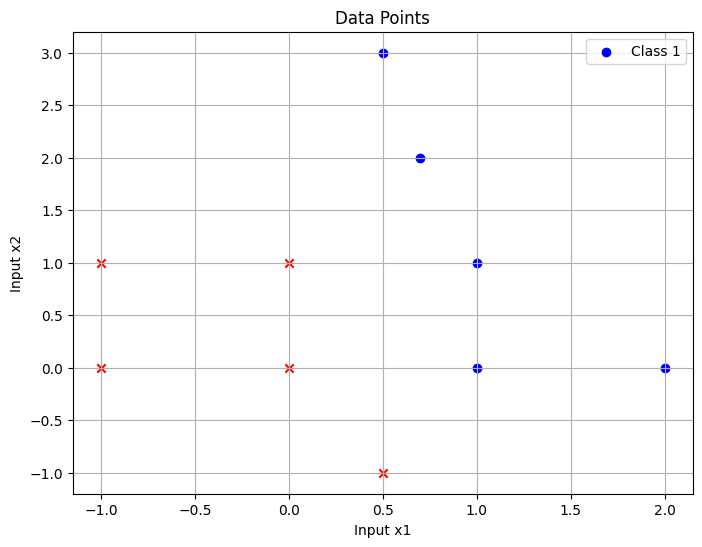

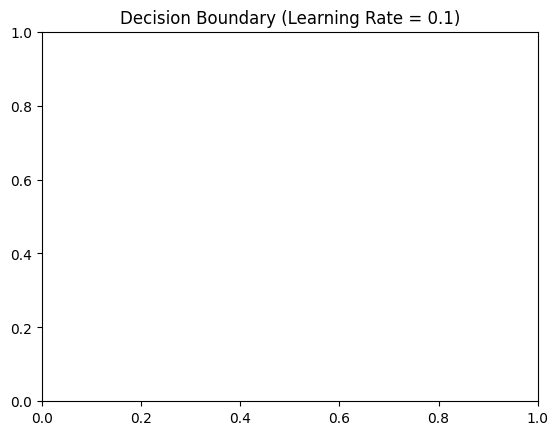

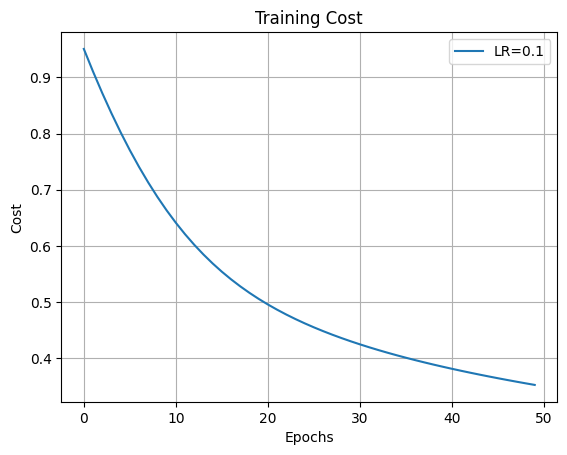

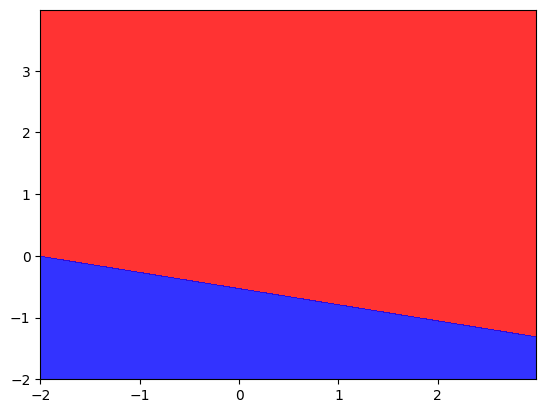

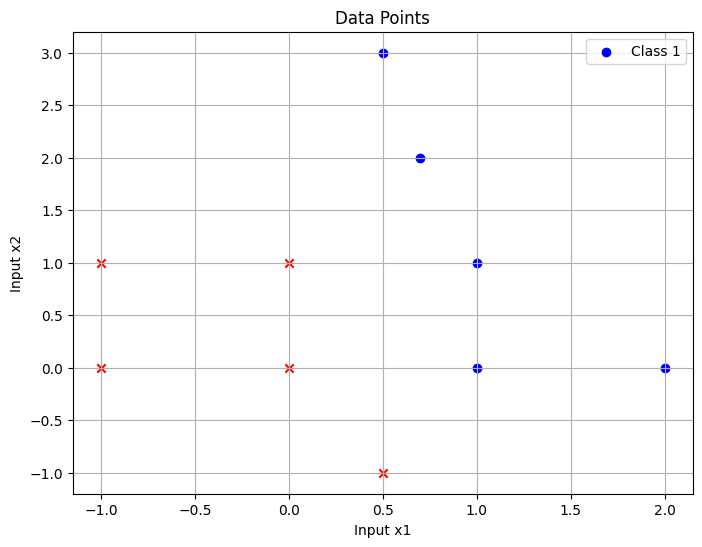

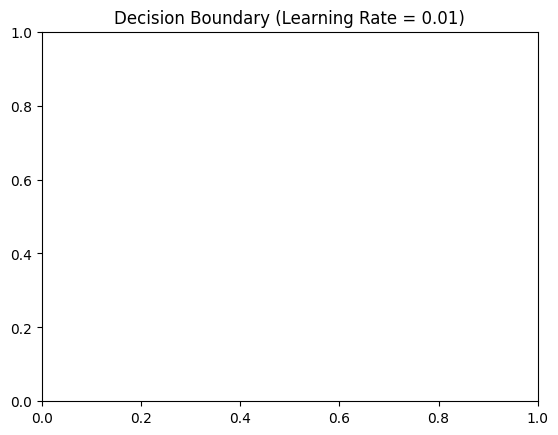

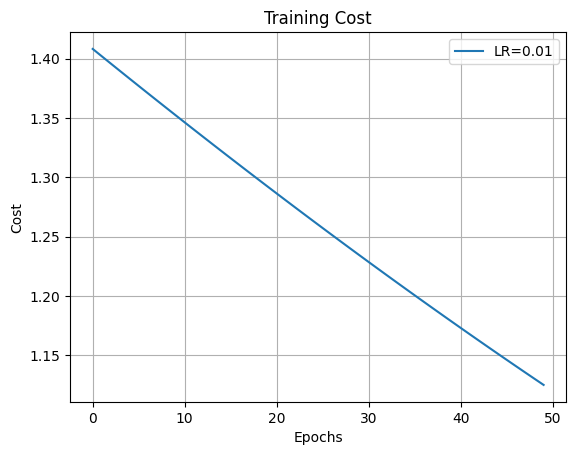

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the NeuralNetwork class
class NeuralNetwork:
    def __init__(self, learning_r):
        self.weights = np.random.randn(3, 1)
        self.learning_rate = learning_r
        self.history = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights))

    def train(self, inputs_train, labels_train, num_train_iterations):
        m = len(labels_train)
        for _ in range(num_train_iterations):
            predictions = self.forward_propagation(inputs_train)
            error = predictions - labels_train
            gradient = np.dot(inputs_train.T, error) / m
            self.weights -= self.learning_rate * gradient
            cost = -np.mean(labels_train * np.log(predictions) + (1 - labels_train) * np.log(1 - predictions))
            self.history.append((self.weights.copy(), cost))

# Step 1: Create input and label arrays
inputs = np.array([
    [1, 1],
    [1, 0],
    [0, 1],
    [0.5, -1],
    [0.5, 3],
    [0.7, 2],
    [-1, 0],
    [-1, 1],
    [2, 0],
    [0, 0]
])

labels = np.array([[1], [1], [0], [0], [1], [1], [0], [0], [1], [0]])

# Step 2: Plot data points
def plot_data(inputs, labels):
    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        if labels[i] == 1:
            plt.scatter(inputs[i, 0], inputs[i, 1], marker='o', color='b', label='Class 1' if i == 0 else "")
        else:
            plt.scatter(inputs[i, 0], inputs[i, 1], marker='x', color='r', label='Class 0' if i == 0 else "")
    plt.xlabel('Input x1')
    plt.ylabel('Input x2')
    plt.legend()
    plt.title('Data Points')
    plt.grid(True)
    plt.show()

plot_data(inputs, labels)

# Step 3: Add bias to inputs
inputs_bias = np.hstack((inputs, np.ones((inputs.shape[0], 1))))

# Step 4: Train the network
def train_and_plot(learning_rate, inputs, labels, epochs):
    nn = NeuralNetwork(learning_rate)
    nn.train(inputs, labels, epochs)

    # Step 5: Plot the decision boundary
    def plot_decision_boundary(nn, inputs, labels):
        x_min, x_max = inputs[:, 0].min() - 1, inputs[:, 0].max() + 1
        y_min, y_max = inputs[:, 1].min() - 1, inputs[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape)]
        probs = nn.forward_propagation(grid).reshape(xx.shape)
        plt.contourf(xx, yy, probs, alpha=0.8, levels=[0, 0.5, 1], colors=['red', 'blue'])
        plot_data(inputs[:, :2], labels)
        plt.title(f'Decision Boundary (Learning Rate = {learning_rate})')
        plt.show()

    plot_decision_boundary(nn, inputs, labels)

    # Step 6: Plot the training cost
    costs = [c for _, c in nn.history]
    plt.plot(range(epochs), costs, label=f'LR={learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Training Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train and plot for different learning rates
learning_rates = [1, 0.5, 0.1, 0.01]
epochs = 50

for lr in learning_rates:
    train_and_plot(lr, inputs_bias, labels, epochs)